In [1]:
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


In [2]:
m_check = ModelCheckpoint("model/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [3]:
x = np.load("../train.npy")
print(x[0])

y = np.load("y.npy")
predx = Image.open("../495.png").resize(((150,112)))
predx= np.asarray(predx).reshape(1,112,150,3)



[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [36]:
def create_model():
    model = Sequential()
    model.add(Conv2D(200,(3,3),padding='same',activation='relu',input_shape=(112,150,3)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(200,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(100,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(100,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(100,(2,2),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(100,(2,2),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(100,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

    return model


In [14]:
seed = np.random.seed(7)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [15]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [16]:
model = create_model()

In [17]:
x.shape

(4500, 112, 150, 3)

In [18]:
# for train_i,test_i in kf.split(x):
#     train_x,train_y = x[train_i],y[train_i]
#     test_x, test_y = x[test_i], y[test_i]

#     model.fit(train_x,train_y,batch_size=30,epochs=100,validation_split=0.25,callbacks=[m_check])
#     score = model.evaluate(test_x,test_y)
#     print(score)

In [37]:
history = model.fit(x_train,y_train,batch_size=50,epochs=100,validation_split=0.25,callbacks=[m_check])


Epoch 1/100
51/51 [==============================] - 4s 71ms/step - loss: 0.1058 - acc: 0.9660 - val_loss: 0.0723 - val_acc: 0.9917
Epoch 2/100
51/51 [==============================] - 4s 69ms/step - loss: 0.0995 - acc: 0.9668 - val_loss: 0.0603 - val_acc: 0.9917
Epoch 3/100
51/51 [==============================] - 4s 69ms/step - loss: 0.1000 - acc: 0.9739 - val_loss: 0.0692 - val_acc: 0.9917
Epoch 4/100
51/51 [==============================] - 4s 70ms/step - loss: 0.1101 - acc: 0.9629 - val_loss: 0.0642 - val_acc: 0.9929
Epoch 5/100
51/51 [==============================] - 4s 69ms/step - loss: 0.1076 - acc: 0.9648 - val_loss: 0.0510 - val_acc: 0.9929
Epoch 6/100
51/51 [==============================] - 4s 69ms/step - loss: 0.1119 - acc: 0.9668 - val_loss: 0.0648 - val_acc: 0.9953
Epoch 7/100
51/51 [==============================] - 4s 69ms/step - loss: 0.0834 - acc: 0.9672 - val_loss: 0.0558 - val_acc: 0.9929
Epoch 8/100
51/51 [==============================] - 4s 72ms/step - loss: 0.

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

acc = history.history['acc']
val_acc = history.history['val_acc']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))


plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


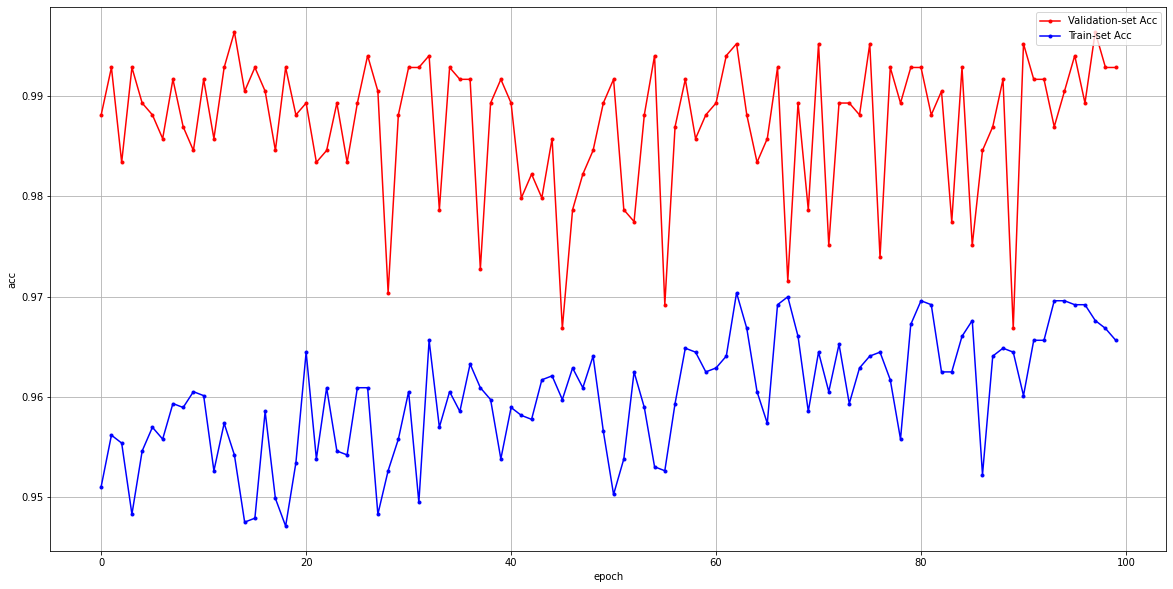

In [35]:

plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc")
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [25]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 0s 12ms/step - loss: 0.0568 - acc: 0.9920
[0.05682431533932686, 0.9919999837875366]
